In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 42.18 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [5]:
img_width = 64
img_height = 64

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [7]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width,img_height),class_mode='binary',batch_size=16,subset='training')

Found 22048 images belonging to 2 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size=(img_width,img_height),class_mode='binary',batch_size=16,subset='validation')

Found 5510 images belonging to 2 classes.


In [11]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit_generator(generator=train_data_generator, steps_per_epoch= len(train_data_generator), epochs=5, verbose=1, validation_data=validation_data_generator, validation_steps=len(validation_data_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1378/1378 [==============================] - 109s 78ms/step - loss: 0.4108 - accuracy: 0.8260 - val_loss: 0.2174 - val_accuracy: 0.9263
Epoch 2/5
1378/1378 [==============================] - 107s 78ms/step - loss: 0.2217 - accuracy: 0.9229 - val_loss: 0.1971 - val_accuracy: 0.9212
Epoch 3/5
1378/1378 [==============================] - 108s 78ms/step - loss: 0.1978 - accuracy: 0.9315 - val_loss: 0.1775 - val_accuracy: 0.9374
Epoch 4/5
1378/1378 [==============================] - 109s 79ms/step - loss: 0.1841 - accuracy: 0.9411 - val_loss: 0.1682 - val_accuracy: 0.9405
Epoch 5/5
1378/1378 [==============================] - 109s 79ms/step - loss: 0.1710 - accuracy: 0.9463 - val_loss: 0.1676 - val_accuracy: 0.9463


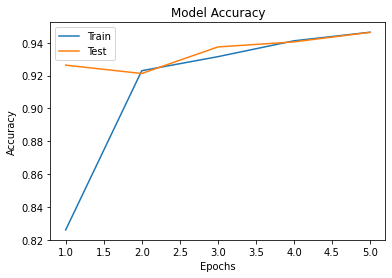

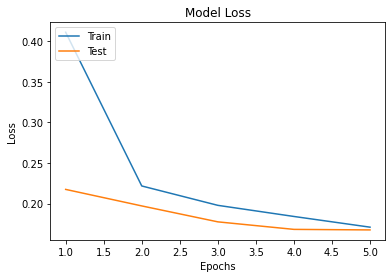

In [17]:
epochs_range = range(1,6)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()